In [2]:
import cv2
import matplotlib.pyplot as plt

from os import listdir, path, makedirs 
from os.path import isfile, join

import shutil
import numpy as np

from sklearn.metrics import accuracy_score

<h1>Classificador de Cascata de Haar

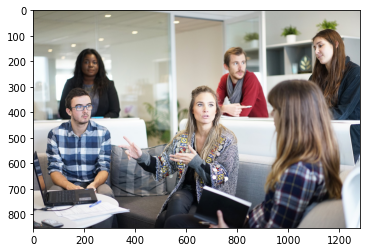

In [8]:
imagem = cv2.imread("C:\\Users\\Vitoria\\Documents\\git\\cursos\\reconhecimento_facial_openCV\\alura-analise-facial\\imagens\\px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

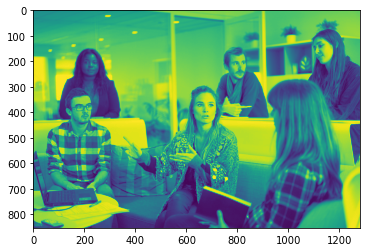

In [9]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem_gray)

In [10]:
imagem_gray.shape

(853, 1280)

In [13]:
classificador = cv2.CascadeClassifier("C:\\Users\\Vitoria\\Documents\\git\\cursos\\reconhecimento_facial_openCV\\alura-analise-facial\\classificadores\\haarcascade_frontalface_default.xml")

In [15]:
faces = classificador.detectMultiScale(imagem_gray, 1.1, 5)
len(faces)

5

In [16]:
faces[0]

array([619, 328, 113, 113], dtype=int32)

In [17]:
imagem_anotada = imagem.copy()

In [18]:
for (x, y, w, h) in faces: 
    cv2.rectangle(imagem_anotada, (x,y), (x+w, y+h), (225, 225, 0), 2)

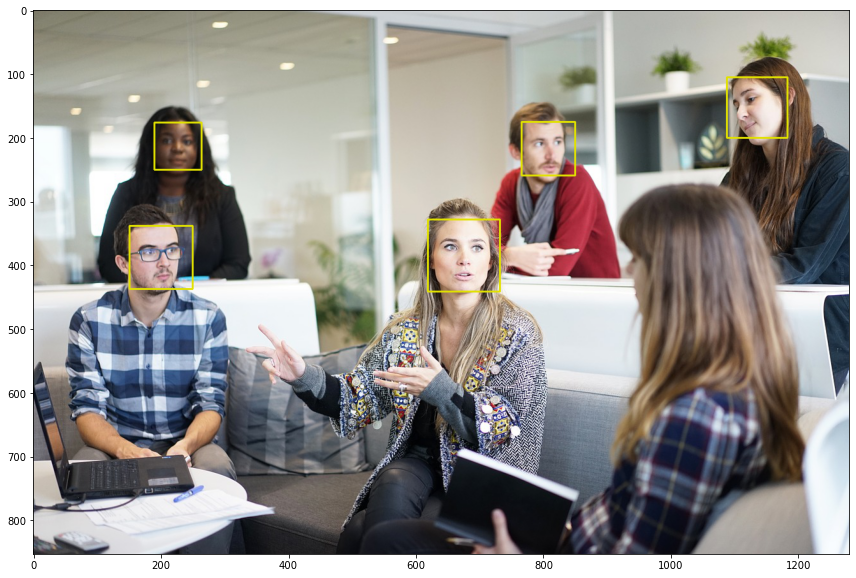

In [19]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_anotada)

In [20]:
face_imagem = 0

for (x,y,w,h) in faces:
    face_imagem += 1 
    imagem_roi = imagem[y:y+h, x:x+w]
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite("face_" + str(face_imagem) + ".png", imagem_roi)

<h1>Separação de Imagens 

In [21]:
imagem_face1 = cv2.imread("C:\\Users\\Vitoria\\Documents\\git\\cursos\\reconhecimento_facial_openCV\\alura-analise-facial\\imagens\\cropped_faces\\s01_01.jpg")
imagem_face1 = cv2.cvtColor(imagem_face1, cv2.COLOR_BGR2RGB)

imagem_face2 = cv2.imread("C:\\Users\\Vitoria\\Documents\\git\\cursos\\reconhecimento_facial_openCV\\alura-analise-facial\\imagens\\cropped_faces\\s02_01.jpg")
imagem_face2 = cv2.cvtColor(imagem_face2, cv2.COLOR_BGR2RGB)

imagem_face3 = cv2.imread("C:\\Users\\Vitoria\\Documents\\git\\cursos\\reconhecimento_facial_openCV\\alura-analise-facial\\imagens\\cropped_faces\\s03_01.jpg")
imagem_face3 = cv2.cvtColor(imagem_face3, cv2.COLOR_BGR2RGB)

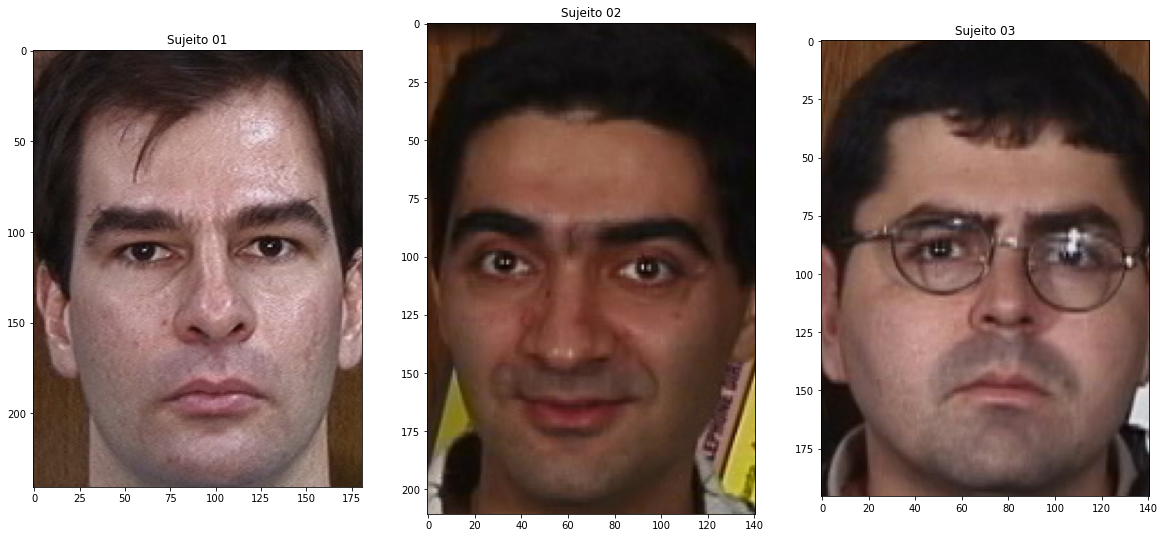

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face1)

plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face2)

plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face3)


In [23]:
imagem_face1.shape

(241, 181, 3)

In [24]:
imagem_face2.shape

(211, 141, 3)

In [25]:
imagem_face3.shape

(196, 141, 3)

Vamos separar as imagens em 10 para treinar o modelo e 5 para testar e validar se deu certo.

In [26]:
faces_caminho = "C:\\Users\\Vitoria\\Documents\\git\\cursos\\reconhecimento_facial_openCV\\alura-analise-facial\\imagens\\cropped_faces\\"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [27]:
lista_arq_faces[0]

's01_01.jpg'

In [28]:
len(lista_arq_faces)

750

In [29]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

<h2>Padronizar Imagens

In [30]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [31]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [32]:
lista_faces_treino[0]

's01_01.jpg'

In [33]:
lista_faces_teste[0]

's01_11.jpg'

In [34]:
dados_treinamento, sujeitos = [], []

In [35]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [36]:
len(dados_treinamento)

500

In [37]:
len(sujeitos)

500

In [38]:
dados_teste, sujeitos_teste = [], []

In [39]:
for i, arq in enumerate (lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito_teste = arq[1:3]
    sujeitos_teste.append(int(sujeito_teste))

In [40]:
len(dados_teste)

250

In [41]:
len(sujeitos_teste)

250

Text(0.5, 1.0, '5')

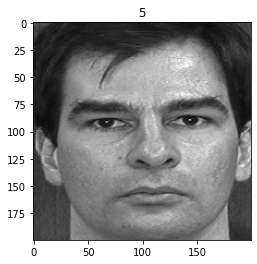

In [42]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

Text(0.5, 1.0, '1')

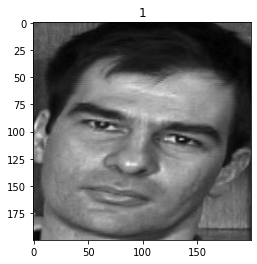

In [43]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])

<h1>Classificador Eingenfaces

In [44]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [45]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [46]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

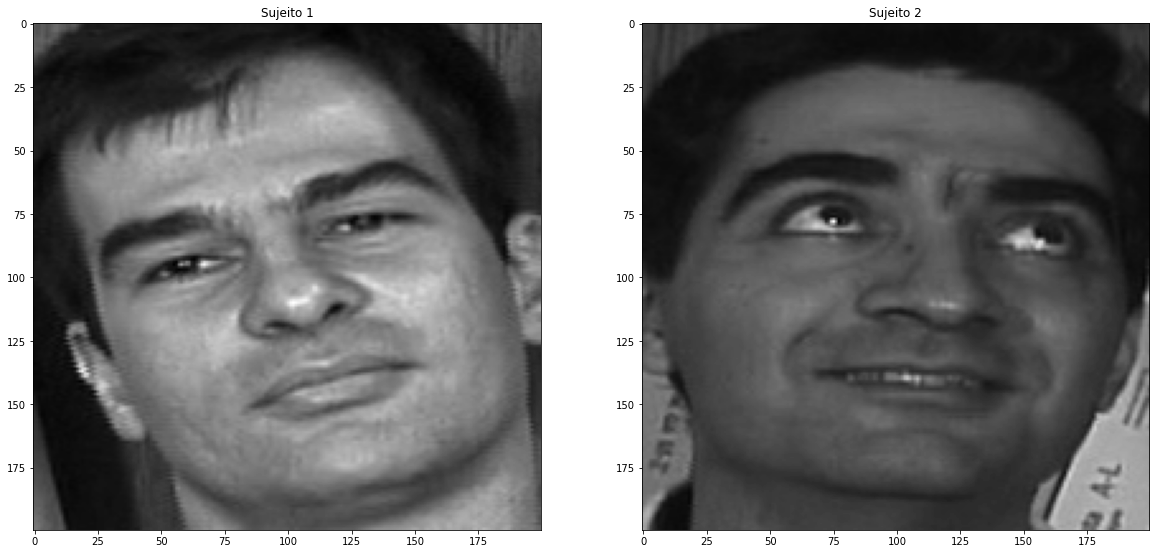

In [47]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[3]))
plt.imshow(dados_teste[3], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[9]))
plt.imshow(dados_teste[9], cmap="gray")

plt.show()

In [48]:
predicao = modelo_eingenfaces.predict(dados_teste[3])
predicao

(1, 4212.094703767273)

In [49]:
predicao = modelo_eingenfaces.predict(dados_teste[9])
predicao

(2, 4621.298911152551)

Nem todos os sujeitos o reconhecimento foi bem sucedido.

<h1>Classificador Fisherfaces

LDA: Linear Discriminant Analysis

Maximizar a variância entre classes (Bom para separar pessoas em classes diferentes, ou seja, João, Maria, José...)


In [50]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [51]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

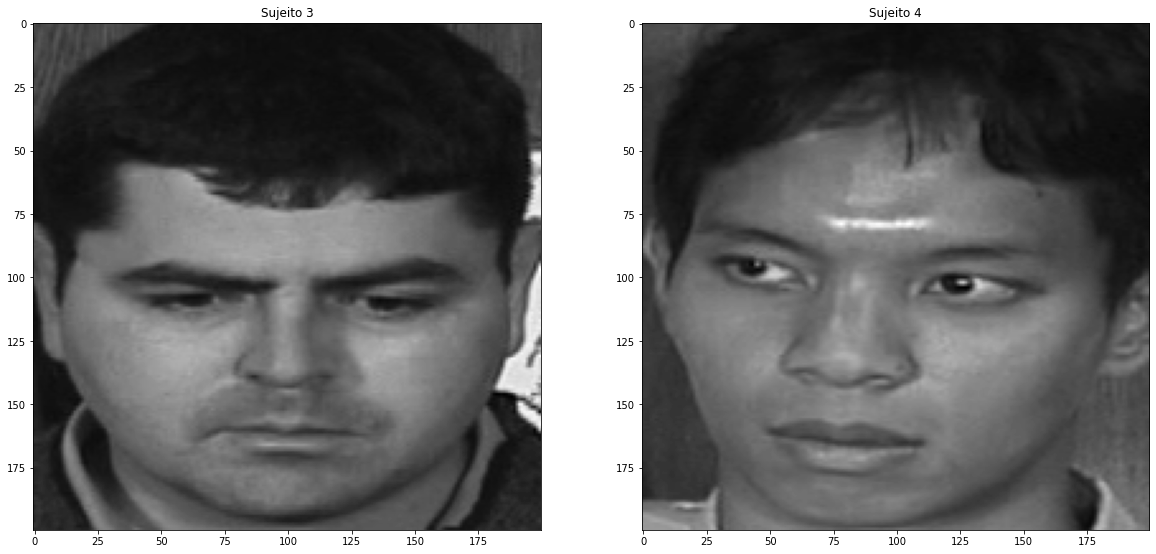

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[13]))
plt.imshow(dados_teste[13], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[19]))
plt.imshow(dados_teste[19], cmap="gray")

plt.show()

In [53]:
predicao = modelo_fisherfaces.predict(dados_teste[13])
predicao

(3, 891.3759675033427)

In [54]:
predicao = modelo_fisherfaces.predict(dados_teste[19])
predicao

(4, 795.1563217852155)


<h1>Classificador LBPH

Mais robusto que os demais

Construção de Vetor de Características

Analise de 3x3 pixels 

Extração de um histograma do vetor (como se fosse um gráfico) e compara os histogramas das imagens e a classificação se dá por distância euclidiana

In [55]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [56]:
modelo_lbph.train(dados_treinamento, sujeitos)

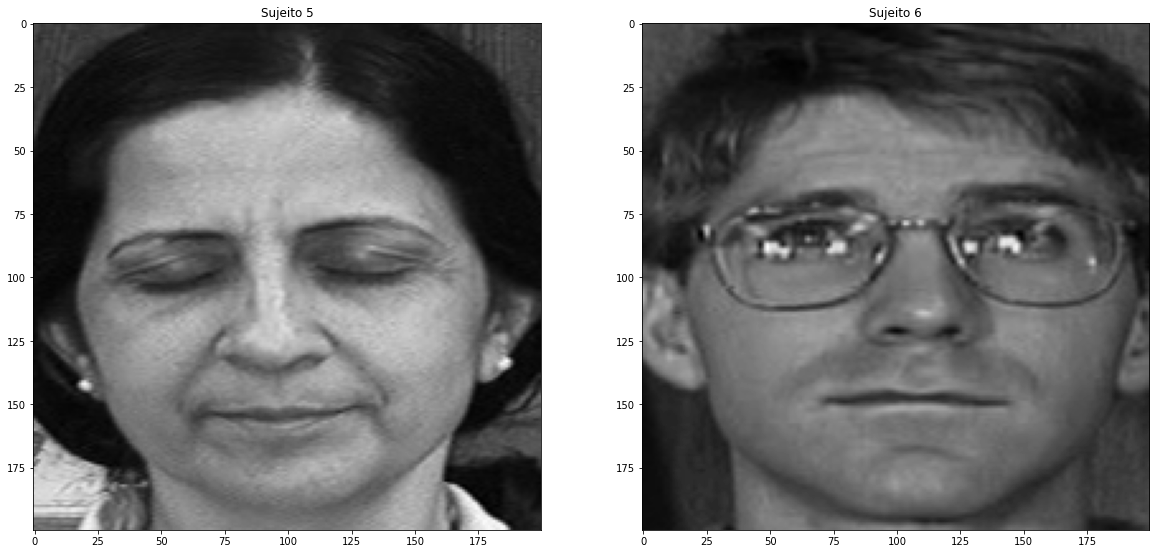

In [57]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_teste[21]))
plt.imshow(dados_teste[21], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

plt.show()

In [58]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(5, 32.938584374874814)

In [59]:
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(6, 36.49919959564635)

<h1>Precisão dos Algoritmos

Vamos fazer a análise de todas as imagens

In [60]:
y_pred_eingenfaces = []

In [ ]:
for item in dados_teste:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [ ]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_pred_eingenfaces)

In [ ]:
acuracia_eingenfaces

In [ ]:
y_pred_fisherfaces = []

In [ ]:
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

In [ ]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)

In [ ]:
acuracia_fisherfaces

In [ ]:
y_pred_lbph = []

In [ ]:
for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [ ]:
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)

In [ ]:
acuracia_lbph